## **TOPIC MODELLING AND RECOMENDATION**

In [ ]:
#install (env pending)
#!pip install langdetect
#install NLTK
#python -m nltk.downloader all

In [2]:
## **LOAD PACKAGES**

import pandas as pd
import os
from datetime import datetime
import numpy as np

#Sometimes I will use R functions (those I believe are the best ones)
# Load in the r magic
%load_ext rpy2.ipython

In [3]:
#load treated and aggregated datas
df = pd.read_csv('data/treated_data.csv') 
print(df.shape)

(9860, 15)


In [4]:
df.dtypes

Page Title            object
Source                object
Country               object
Device Category       object
Sessions             float64
Avg. Time on Page      int64
Bounce Rate          float64
Page Views           float64
Unique Page Views    float64
Users                float64
url_title             object
content               object
date                  object
title                 object
content_length         int64
dtype: object

In [5]:
## We will keep only topics in spanish, but filtering by country does not work
#df = df[df['Country'] == 'spain']

In [6]:
df.head()

,Page Title,Source,Country,Device Category,Sessions,Avg. Time on Page,Bounce Rate,Page Views,Unique Page Views,Users,url_title,content,date,title,content_length
0,financial text classification: an analysis of ...,(direct),spain,mobile,47.0,339,0.8511,64.0,50.0,28.0,4062-2,\ndurante los últimos dos veranos he trabajado...,2018-06-11,clasificación de texto financiero: un análisis...,15966
1,financial text classification: an analysis of ...,(direct),spain,desktop,19.0,698,0.7368,30.0,25.0,20.0,4062-2,\ndurante los últimos dos veranos he trabajado...,2018-06-11,clasificación de texto financiero: un análisis...,15966
2,financial text classification: an analysis of ...,t.co,spain,mobile,14.0,0,1.0000,14.0,14.0,5.0,4062-2,\ndurante los últimos dos veranos he trabajado...,2018-06-11,clasificación de texto financiero: un análisis...,15966
3,financial text classification: an analysis of ...,linkedin.com,spain,desktop,13.0,685,0.8462,16.0,14.0,12.0,4062-2,\ndurante los últimos dos veranos he trabajado...,2018-06-11,clasificación de texto financiero: un análisis...,15966
4,financial text classification: an analysis of ...,google,united states,desktop,9.0,192,0.8889,13.0,12.0,8.0,4062-2,\ndurante los últimos dos veranos he trabajado...,2018-06-11,clasificación de texto financiero: un análisis...,15966


In [7]:
# there are duplicated information for topic modelling, so it would be nice to eliminate duplicated for this.
columns_val = ['content', 'url_title', 'Country']
df_topic = df[columns_val]
print(df_topic.shape)
df_topic = df_topic.drop_duplicates(subset ='content')
print(df_topic.shape)

(9860, 3)
(105, 3)


In [8]:
df_topic

,content,url_title,Country
0,\ndurante los últimos dos veranos he trabajado...,4062-2,spain
113,\nla economía global digital continuará expand...,7-challenges-for-the-global-digital-economy,india
339,"\nhay increíbles introducciones, cursos y entr...",a-weird-introduction-to-deep-learning,united states
521,\nmaximizar las ganancias es una premisa que s...,adding-fairness-to-dynamic-pricing-with-reinfo...,spain
665,\nmuchas consideraciones juegan un papel impor...,an-international-football-story-how-to-analyze...,spain
...,...,...,...
9515,\nin our recent collaboration with united nati...,what-does-wind-look-like,hong kong
9543,\nla huella digital derivada de nuestra activi...,what-does-your-bank-know-about-you,uruguay
9647,"\nno hace mucho tiempo, mucha gente todavía se...",what-will-the-bank-of-the-future-look-like,spain
9846,\nwe are proud to be part of bbva’s technologi...,part-of-bbvas-technological-progress-and-trans...,united states


## **DETECT LANGUAGE**

In [9]:
from langdetect import detect
df_topic['language'] = df_topic['content'].apply(detect)

In [10]:
df_topic.tail()

,content,url_title,Country,language
9515,\nin our recent collaboration with united nati...,what-does-wind-look-like,hong kong,en
9543,\nla huella digital derivada de nuestra activi...,what-does-your-bank-know-about-you,uruguay,es
9647,"\nno hace mucho tiempo, mucha gente todavía se...",what-will-the-bank-of-the-future-look-like,spain,es
9846,\nwe are proud to be part of bbva’s technologi...,part-of-bbvas-technological-progress-and-trans...,united states,en
9849,"\nadmittedly, i always find it difficult to na...",scaling-to-lots-of-problems,united arab emirates,en


In [11]:
#TextBlob(df.iloc[1,1]).detect_language()

In [12]:
#df_topic["content"].apply(language_txt)

In [13]:
df_topic = df_topic[df_topic["language"] != 'en']
df_topic.tail()
print(df_topic.shape)

(68, 4)


## **Data treatment**

## **STOPWORDS**

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_topic.loc[:,'content'] = df_topic['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/Users/erikapat/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## **LEMMATIZATION**

In [15]:
## lematization
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
lemma=WordNetLemmatizer()
token=nltk.data.load('tokenizers/punkt/spanish.pickle')

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w,'v')
        listLemma.append(x)
    return text
df_topic.loc[:,'content'] = df_topic['content'].map(lambda x : lemitizeWords(x))

In [16]:
df_topic

,content,url_title,Country,language
0,últimos dos veranos trabajado becario bbva dat...,4062-2,spain,es
113,economía global digital continuará expandiéndo...,7-challenges-for-the-global-digital-economy,india,es
339,"increíbles introducciones, cursos entradas blo...",a-weird-introduction-to-deep-learning,united states,es
521,maximizar ganancias premisa siempre presente m...,adding-fairness-to-dynamic-pricing-with-reinfo...,spain,es
665,muchas consideraciones juegan papel importante...,an-international-football-story-how-to-analyze...,spain,es
...,...,...,...,...
9243,aplicaciones física estadística teoría grafos ...,untangle-cascade-effects-complex-systems,spain,es
9348,ciudades hardware físico sirve soporte múltipl...,urban-analytics-to-measure-the-economic-impact...,spain,es
9395,"finales año pasado, urban discovery mostró nue...",urban-discovery-a-vision-to-rethink-cities,spain,es
9543,huella digital derivada actividad bancaria (tr...,what-does-your-bank-know-about-you,uruguay,es


## **TOPIC MODELLING**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=None)
dtm = tfidf.fit_transform(df_topic['content'])

In [18]:
dtm

<68x3579 sparse matrix of type '<class 'numpy.float64'>'
	with 18351 stored elements in Compressed Sparse Row format>

## **NMF: Non-Negative Matrix Factorization (NMF)**

In [19]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=7,random_state=42)
# This can take awhile, we're dealing with a large amount of documents!
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=7, random_state=42, shuffle=False, solver='cd', tol=0.0001,
  verbose=0)

In [20]:
len(tfidf.get_feature_names())

3579

In [21]:
import random
for i in range(10):
    random_word_id = random.randint(0,len(tfidf.get_feature_names()))
    print(tfidf.get_feature_names()[random_word_id])

potencialmente
nacional
imprevistos
industrial
señales
volumen
enormemente
facilita
normalización
continuous


In [22]:
for i in range(10):
    random_word_id = random.randint(0,len(tfidf.get_feature_names()))
    print(tfidf.get_feature_names()[random_word_id])

de
pública
nos
gráficos
introducir
sirven
analizó
lisboa
flujos
peatones


In [23]:
len(nmf_model.components_)

7

In [24]:
nmf_model.components_

array([[0.00237331, 0.0165615 , 0.003207  , ..., 0.00165877, 0.02820496,
        0.01253705],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00596934,
        0.        ],
       [0.05247358, 0.01669061, 0.00704786, ..., 0.        , 0.        ,
        0.00264694],
       ...,
       [0.03125727, 0.03293669, 0.01791406, ..., 0.00544971, 0.03280384,
        0.01276598],
       [0.012201  , 0.        , 0.00057586, ..., 0.        , 0.00445837,
        0.01603016],
       [0.        , 0.        , 0.01139958, ..., 0.00206193, 0.01009385,
        0.0131604 ]])

In [25]:
len(nmf_model.components_[0])

3579

In [26]:
single_topic = nmf_model.components_[0]

In [27]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([1789, 2222, 2227, ...,  943,  267, 1992])

In [28]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([2302,  888,  711,  916, 2960, 2909, 2062,  943,  267, 1992])

In [29]:
top_word_indices = single_topic.argsort()[-10:]

In [30]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

neuronales
cursos
concepto
datos
representación
redes
machine
deep
aprendizaje
learning


In [31]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['charla', 'modelos', 'and', 'conferencia', 'automático', 'neuronales', 'cursos', 'concepto', 'datos', 'representación', 'redes', 'machine', 'deep', 'aprendizaje', 'learning']


THE TOP 15 WORDS FOR TOPIC #1
['permite', 'talento', 'entorno', 'fabien', 'digital', 'responsable', 'commerce360', 'science', 'clientes', 'big', 'datos', 'banco', 'entrevista', 'bbva', 'data']


THE TOP 15 WORDS FOR TOPIC #2
['atributos', 'urbana', 'urban', 'barrios', 'zona', 'áreas', 'méxico', 'actividad', 'datos', 'comercial', 'barcelona', 'madrid', 'zonas', 'ciudades', 'ciudad']


THE TOP 15 WORDS FOR TOPIC #3
['uso', 'datos', 'microsoft', 'deep', 'tensorflow', 'machine', 'sql', 'summit', 'comunidad', 'gpu', 'streaming', 'learning', 'docker', 'apache', 'spark']


THE TOP 15 WORDS FOR TOPIC #4
['logística', 'financiera', 'ingresos', 'modelo', 'comentarios', 'transacción', 'motor', 'datos', 'predicción', 'transacciones', 'gastos', 'incertidumbre', 'bbva', 'cliente', 'clientes']




In [32]:
topic_results = nmf_model.transform(dtm)
print(topic_results.shape)

(68, 7)


In [33]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [34]:
df_topic['Topic'] = topic_results.argmax(axis=1)

/Users/erikapat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def plot_LSA(data, text_labels, plot = True):
    '''
    Dimensionality reduction using truncated SVD (aka LSA).

    This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 
    Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. 
    This means it can work with scipy.sparse matrices efficiently.
    '''
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(data)
    lsa_scores = lsa.transform(data)
    color_mapper = {label:idx for idx,label in enumerate(set(text_labels))}
    color_column = [color_mapper[label] for label in text_labels]
    colors = ['orange','blue','red', 'gray', 'purple', 'black', 'green']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=75, alpha=.1, c=text_labels, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color='orange', label='0')
        blue_patch = mpatches.Patch(color='blue', label='1')
        red_patch = mpatches.Patch(color='red', label='2')
        gray_patch = mpatches.Patch(color='gray', label='3')
        purple_patch = mpatches.Patch(color='purple', label='4')
        black_patch = mpatches.Patch(color='black', label='5')
        green_patch = mpatches.Patch(color='green', label='6')
        plt.legend(handles=[orange_patch, blue_patch, red_patch, gray_patch, purple_patch,
                            black_patch, green_patch], 
                   prop={'size': 30})

  

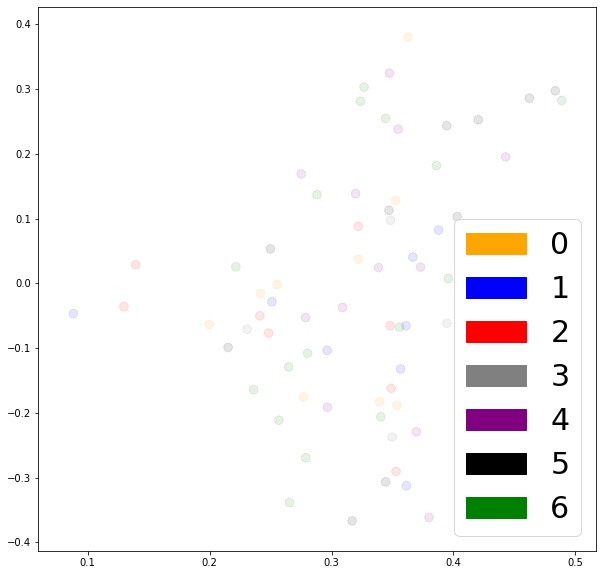

In [57]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(dtm, df_topic.Topic)
plt.show()

## **UNDERSTAND THE TOPICS**

In [37]:
pd.set_option('display.max_colwidth', 199)  # or 199
df_topic = df_topic.sort_values(by=['Topic'])
df =df_topic[['url_title', 'content', 'Topic']]

In [38]:
print(df[df['Topic'] == 0].shape)
df[df['Topic'] == 0].head()

(10, 3)


,url_title,content,Topic
6930,saw-open-data-science-conference-europe-2017,"odsc londres 2017 mostró asombrosa variedad herramientas, librerías, notebooks aplicaciones ciencia datos. 75 ponentes, 1.500 asistentes literalmente espacio más. importa si prefieres python, r i...",0
6497,saw-ecml-pkdd-2017,"pasado septiembre placer asistir european conference on machine learning (ecml), venido celebrando simultáneamente junto conferencia principles and practice of knowledge discovery in databases (p...",0
5049,not-deep-learning-learning-represent,"recientemente, creado grupo trabajo dedicado deep learning (aprendizaje profundo). grupos trabajo ofrecen oportunidades compartir internamente ideas, conceptos, recursos, código, etc. además, pre...",0
6789,saw-liked-2017,"bbva data & analytics encanta compartir artículos, blogs noticias inteligencia artificial (ai) aprendizaje automático (ml) mantener día compromiso pasión utilización aprendizaje automático campo ...",0
6997,saw-recsys-2017-conference,"recsys, lugar pasado 27 agosto 2017, mayores jornadas académicas sistemas recomendación (recsys) alcanzado año undécima edición récord histórico asistentes (627), demuestra creciente importancia ...",0


In [39]:
print(df[df['Topic'] == 1].shape)
df[df['Topic'] == 1].head()

(8, 3)


,url_title,content,Topic
1476,big-data-volume-is-not-the-problem-but-the-generation-of-value-in-an-environment-with-such-diversity,jon ander beracoechea — co-ceo bbva data & analytics jon doctorado ingeniería eléctrica publicado múltiples trabajos campo procesamiento adaptativo señales. hace 9 años aplica técnicas avanzadas ...,1
3785,first-look-back-look-forward,"medida finaliza 2017, momento ideal elaborar lista logros alcanzados período y, supuesto, discutir nuevos retos avecinan. co-ceos fabien girardin jon ander beracoechea acaban cerrar revisión obje...",1
1287,big-data-transformed-bbva-way-things,"fabien girardin, co-ceo bbva data & analytics, concedió entrevista publicada recientemente revista knowmadas analiza aplicación avanzada técnicas análisis big data banca principales componentes s...",1
9543,what-does-your-bank-know-about-you,"huella digital derivada actividad bancaria (transferencias realizadas, movimientos tarjetas, etc.), supone fuente información rica actualización permanente, permite banco desarrollar productos se...",1
2742,digital-transformation-big-data-companies,"pasado simposio internacional innovación aplicada imat, celebrado 28 30 junio valencia, compañero josep amorós, responsable commerce360, participó ponente charla dedicada transformación digital b...",1


In [40]:
print(df[df['Topic'] == 2].shape)
df[df['Topic'] == 2].head()

(8, 3)


,url_title,content,Topic
2389,creating-value-from-geolocated-financial-data,"recientemente, lugar carto locations 2017, conferencia inmersiva 2 días últimos desarrollos industria, innovación ideas mundo inteligencia localización. junto profesionales expertos industria, el...",2
9348,urban-analytics-to-measure-the-economic-impact-of-traffic-calming,"ciudades hardware físico sirve soporte múltiples dinámicas superpuestas, resultado superposición sistema extremadamente complejo. cualquier cambio condiciones produce efectos positivos negativos ...",2
9395,urban-discovery-a-vision-to-rethink-cities,"finales año pasado, urban discovery mostró nueva forma representar ciudades basada comportamiento compra. enfoque permitió bbva data & analytics examinar madrid, barcelona ciudad méxico bajo nuev...",2
5913,rediscovering-cities-credit-card-data-2,"— lectura resultados perspectiva urbanística antecedentes artículo anterior descrito metodología, modelos herramientas analíticas representación empleados proyecto urban discovery, desarrollado j...",2
9243,untangle-cascade-effects-complex-systems,aplicaciones física estadística teoría grafos fenómenos sociales ayudando descubrir patrones comportamiento inesperados permiten reaccionar manera efectiva eventos desestabilizadores redes comple...,2


In [41]:
print(df[df['Topic'] == 3].shape)
df[df['Topic'] == 3].head()

(4, 3)


,url_title,content,Topic
7068,saw-spark-summit-2017-spark-embraces-deep-learning,"conferencia spark summit 2017, lugar san francisco pasado mes junio, atrajo 3000 miembros distintos sectores participaron 170 sesiones discutir tendencias construirán productos basados datos futu...",3
7142,saw-spark-summit-europe-2017-spark-libraries-real-machine-learning-systems-production-reality-deep-learning-spark,"hace mes lugar último spark summit europe, evento grande mundo comunidad apache spark™, participaron 1200 desarrolladores, ingenieros, científicos datos, investigadores profesionales negocio. jos...",3
2804,environment-spark-less-30-seconds-thanks-docker,"seguro alguna vez querido “cacharrear” alguna tecnología, afán aprender seguro visto mermado dificultad instalar necesario sistema operativo. artículo explicaremos cómo empezar jugar spark import...",3
2165,cost-effective-scalable-collaborative-filtering-based-recommender-system,"pasado jueves (26 septiembre) oportunidad presentar colaboración bbva data & analytics beeva theatre of partners aws summit madrid 2017. conferencia, presentamos enfoque rentable sistemas recomen...",3


In [42]:
print(df[df['Topic'] == 4].shape)
df[df['Topic'] == 4].head()

(12, 3)


,url_title,content,Topic
5154,one-click-closer-to-an-ai-powered-account-manager,"mientras preparas café mañana, corres junto río justo subirte coche. ahora puedes completar transferencia pago, administrar salud cuenta perder vista rutina, llenar tediosa lista números formular...",4
5336,personalizing-banking-services-advanced-data-analytics,"modelo bancario tradicional, datos producidos cliente procesados analistas datos. ingresos gastos clientes utilizaron comprender tendencias globales diseñar productos servicios atractivos segment...",4
0,4062-2,"últimos dos veranos trabajado becario bbva data & analytics, tiempo desarrollado trabajo gustaría explorar artículo. sigue resumen técnico aprendizajes adquiridos trabajando embedding palabras ca...",4
4592,kitties-helped-bbva-detect-credit-card-fraud,grupo científicos datos bbva data & analytics desarrollado modelo aprendizaje profundo utiliza novedoso enfoque detección fraudes tarjetas crédito. metodología sido aplicada científicos datos bbv...,4
4359,improving-response-rate-non-customer-campaigns-smote-algorithm,"antecedentes atraer nuevos clientes reto cualquier empresa, tasa respuesta campañas marketing generalmente baja no-clientes. algoritmos tradicionales aprendizaje automático, regresión logística, ...",4


In [43]:
print(df[df['Topic'] == 5].shape)
df[df['Topic'] == 5].head(7)

(10, 3)


,url_title,content,Topic
6722,saw-liked-2017-part-3,"campo amplio machine learning: análisis redes nuevas interacciones máquinas interacciones máquinas humanos — iskra velitchkova ciencia, tradicionalmente vivido cómoda complejidad, exige, parte so...",5
7322,stephen-hawking-genius-saw-potential-responsible-development-artificial-intelligence,"stephen hawking (1942-2018) dejó mundo dedicarse estrellas pi day, celebrado matemáticos físicos mundo. leyeron “una breve historia tiempo” decidieron explorar mundo través números ojos científic...",5
8435,the-most-important-developments-in-data-science-of-2018,"año punto dar finalizado sido importantes cuanto desarrollo tecnologías aprendizaje autónomo (machine learning). 2018, gran parte debate centrado cómo seguir perfeccionando tecnologías pasar simp...",5
4899,nips-chronicles-saw,puede convertido tradición: diciembre momento muestran frutos maduros 12 meses investigación global aprendizaje automático definen perfilan tendencias futuras parece haberse convertido reunión im...,5
9647,what-will-the-bank-of-the-future-look-like,"hace tiempo, mucha gente todavía presentaba oficina bancaria cheque pago empleador, recogía dinero iba nueva pila facturas, nunca veía columnas gigantesco edificio siguiente día pago. vieron caso...",5
521,adding-fairness-to-dynamic-pricing-with-reinforcement-learning,"maximizar ganancias premisa siempre presente mente cada comerciante vendedor primeros días comercio; pensaban. realidad, cada actor busca ganancias intercambio bienes servicios tiende inconscient...",5
4753,lifting-the-veil-of-interpretability-in-a-world-controlled-by-algorithms,"cada vez rápida adopción inteligencia artificial (ai) aprendizaje autónomo (machine learning) importantes ámbitos sociedad, falta transparencia torno procesos convertido preocupación perceptible ...",5


In [44]:
print(df[df['Topic'] == 6].shape)
df[df['Topic'] == 6].head(7)

(16, 3)


,url_title,content,Topic
113,7-challenges-for-the-global-digital-economy,"economía global digital continuará expandiéndose diversificándose 2017. nuevas tecnologías, clientes nuevos hábitos amenazas globales abrirán oportunidades amenazas empresas diferentes sectores. ...",6
665,an-international-football-story-how-to-analyze-a-collective-game-individually,"muchas consideraciones juegan papel importante largo sinuoso camino hacia historia fútbol internacional. solo jugador -el astuto maradona, enérgico pelé elegante johan cruyff- puede cambiar desti...",6
1104,bbva-data-analytics-awarded-by-the-banker-technology-projects-of-the-year-award,"entrevista francisco javier lópez peñalver jordi nin jordi nin — científico datos bbva data & analytics jordi doctor ciencias computación, 75 publicaciones investigación revistas, conferencias ca...",6
8653,training-an-essential-perk-to-retain-a-data-scientist-profile,"primer hito bbva data & analytics alcanzó 2011, unidad innovación bbva creó pequeño equipo investigación, comprometido uso fuentes datos existentes resolver retos negocio. varias colaboraciones e...",6
1697,building-open-source-software-in-a-large-corporation,"mundo funciona datos, naturaleza dinámica, accesible adaptable software código abierto (oss, siglas inglés — open source software), ritmo explotación campos ricos datos dolorosamente lento. imagi...",6
5829,recsys-debate-widen-world-find-new-ones,"bbva data & analytics creemos futuro tecnología debe ser continuamente cuestionado, debatido considerado diferentes puntos vista. filosofía, organizamos semana encuentro convencional artistas, ju...",6
6288,research-and-innovation-what-the-future-looks-like-for-the-eu,¿cuáles tecnologías perfilarán futuro unión europea?¿quiénes jugadores implicados creación innovaciones llegar? propósito dar respuesta preguntas analizado fuentes datos abiertos comisión europea...,6


In [45]:
# 0: aprendizaje data science machine learning
# 1: digital change in companies/companies and machine learning
# 2: SMART CITIES
# 3: TOOLS FOR MACHINE LEARNING/TECH
# 4: PERSONALIZATION
# 5: FUTURE/ADVANCE/THE FUTURE AND PAST OF SCIENCE
# 6: RESEARCH

In [46]:
df.head()

,url_title,content,Topic
6930,saw-open-data-science-conference-europe-2017,"odsc londres 2017 mostró asombrosa variedad herramientas, librerías, notebooks aplicaciones ciencia datos. 75 ponentes, 1.500 asistentes literalmente espacio más. importa si prefieres python, r i...",0
6497,saw-ecml-pkdd-2017,"pasado septiembre placer asistir european conference on machine learning (ecml), venido celebrando simultáneamente junto conferencia principles and practice of knowledge discovery in databases (p...",0
5049,not-deep-learning-learning-represent,"recientemente, creado grupo trabajo dedicado deep learning (aprendizaje profundo). grupos trabajo ofrecen oportunidades compartir internamente ideas, conceptos, recursos, código, etc. además, pre...",0
6789,saw-liked-2017,"bbva data & analytics encanta compartir artículos, blogs noticias inteligencia artificial (ai) aprendizaje automático (ml) mantener día compromiso pasión utilización aprendizaje automático campo ...",0
6997,saw-recsys-2017-conference,"recsys, lugar pasado 27 agosto 2017, mayores jornadas académicas sistemas recomendación (recsys) alcanzado año undécima edición récord histórico asistentes (627), demuestra creciente importancia ...",0


In [47]:
dtm

<68x3579 sparse matrix of type '<class 'numpy.float64'>'
	with 18351 stored elements in Compressed Sparse Row format>

In [48]:
df = df[['url_title', 'Topic']]
df.to_csv(r'data/topic_data.csv', index = False)

In [49]:
dth =df_topic['content']

## **RECOMEND SIMILAR ARTICLES**

In [50]:
#nmf_model = NMF(n_components=7,random_state=42)
nmf_features = nmf_model.fit_transform(dtm)
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features)
current_article = df.iloc[1, :]
similarities = df.dot(current_article)

In [51]:
print(similarities.nlargest()) 

1     1.000000
45    0.998987
12    0.997596
19    0.997435
11    0.996199
dtype: float64


In [52]:
type(df_topic)

pandas.core.frame.DataFrame

In [53]:
d_t = pd.DataFrame(df_topic)
d_t = d_t[['content', 'Topic']]
d_t.iloc[1,:]

content    pasado septiembre placer asistir european conference on machine learning (ecml), venido celebrando simultáneamente junto conferencia principles and practice of knowledge discovery in databases (p...
Topic                                                                                                                                                                                                           0
Name: 6497, dtype: object

## **EX: RECOMEND SIMILAR ARTICLES**

In [54]:
#similar articles are: the same article and other 3.

In [55]:
d_t.iloc[list(pd.DataFrame(similarities.nlargest()).index),:]

,content,Topic
6497,"pasado septiembre placer asistir european conference on machine learning (ecml), venido celebrando simultáneamente junto conferencia principles and practice of knowledge discovery in databases (p...",0
4899,puede convertido tradición: diciembre momento muestran frutos maduros 12 meses investigación global aprendizaje automático definen perfilan tendencias futuras parece haberse convertido reunión im...,5
1287,"fabien girardin, co-ceo bbva data & analytics, concedió entrevista publicada recientemente revista knowmadas analiza aplicación avanzada técnicas análisis big data banca principales componentes s...",1
9348,"ciudades hardware físico sirve soporte múltiples dinámicas superpuestas, resultado superposición sistema extremadamente complejo. cualquier cambio condiciones produce efectos positivos negativos ...",2
3785,"medida finaliza 2017, momento ideal elaborar lista logros alcanzados período y, supuesto, discutir nuevos retos avecinan. co-ceos fabien girardin jon ander beracoechea acaban cerrar revisión obje...",1
